**Credit Card Default Prediction Model**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#change directory to access downloaded data
print(os.listdir(singh001avinash_default_credit_card_path))


['attachment_default.csv']


The dataset consists of 10000 individuals and whether their credit card has defaulted or not. The main aim is to build the model using Logistic Regression and predict the accuracy of it . <br>

Attributes:<br>
    
Default : Yes or No (Whether defaulted or Not). <br>
Student : Yes or No (Whether Student or not). <br>
Balance : Total Balance for given credit card holder.<br>
Income : Gross Annual Income of credit card holder.<br>




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


In [ ]:
import pandas as pd
import os

# Get the correct path to the downloaded data
#data_path = singh001avinash_default_credit_card_path[0]  # Assuming it's a list #This was incorrect
data_path = singh001avinash_default_credit_card_path # This is the correct path

# Construct the full path to the CSV file
file_path = os.path.join(data_path, 'attachment_default.csv')

# Read the CSV file using the full path
cred_df = pd.read_csv(file_path)

import re
cred_df.head(10)

default student  balance   income
0      No      No   729.53 44361.63
1      No     Yes   817.18 12106.13
2      No      No  1073.55 31767.14
3      No      No   529.25 35704.49
4      No      No   785.66 38463.50
5      No     Yes   919.59  7491.56
6      No      No   825.51 24905.23
7      No     Yes   808.67 17600.45
8      No      No  1161.06 37468.53
9      No      No     0.00 29275.27

In [ ]:
cred_df.head()

default student  balance   income
0      No      No   729.53 44361.63
1      No     Yes   817.18 12106.13
2      No      No  1073.55 31767.14
3      No      No   529.25 35704.49
4      No      No   785.66 38463.50

In [ ]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


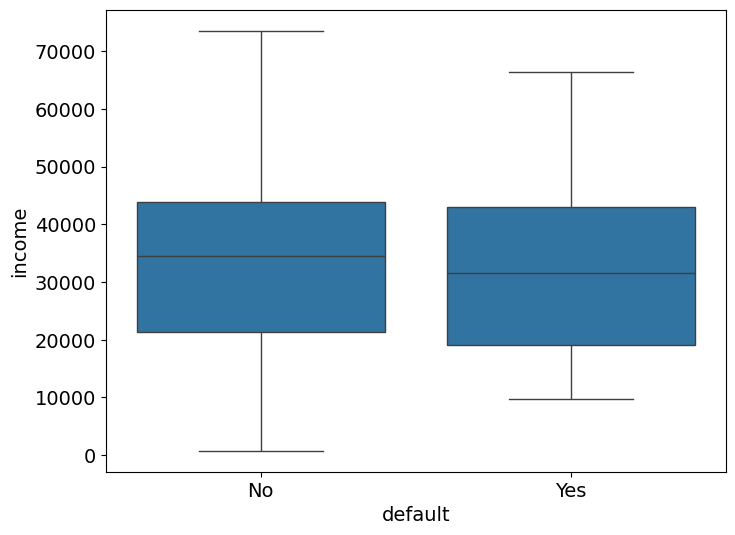

In [ ]:
sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

From the above graph, we can easily classify the majority of student by simply drawing a horizontal line (from balance =1250) that separate Yes  & no (default).This is nothing but a linear classifier describing the relationship between input and output variable and proves that its a condition for the logistic regression.

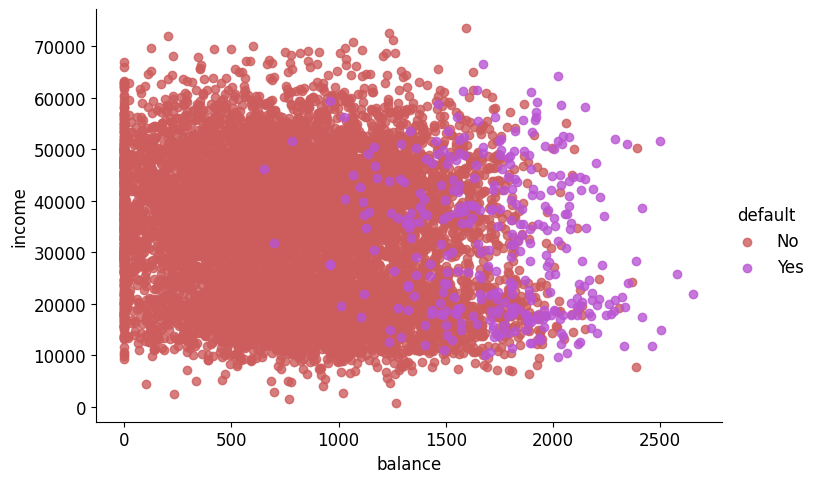

In [ ]:
sns.lmplot(x='balance', y='income', hue='default', data=cred_df, aspect=1.5, fit_reg=False, palette={'Yes': 'mediumorchid', 'No': '#CD5C5C'})  # or '#F08080', '#BC8F8F'
plt.show()

**A scatter plot and box and whisker diagram seem to suggest that there is a relationship between credit card balance and default, while income is not related. The diagram also suggest that the default rates are higher when balance is high.**

In [ ]:
pd.crosstab(cred_df['default'], cred_df['student'], rownames=['Default'], colnames=['Student'])

Student    No   Yes
Default            
No       6850  2817
Yes       206   127

# Generating Dummy variable

The dummy variable <b>default_yes</b> reflecting the class value 0 or 1. When class value is 1 then we have the default case.

In [ ]:
# Convert Categorical to Numerical
default_dummies = pd.get_dummies(cred_df.default, prefix='default')
default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
cred_df = pd.concat([cred_df, default_dummies], axis=1)
cred_df.head()
#default_dummies

default student  balance   income  default_Yes
0      No      No   729.53 44361.63        False
1      No     Yes   817.18 12106.13        False
2      No      No  1073.55 31767.14        False
3      No      No   529.25 35704.49        False
4      No      No   785.66 38463.50        False

In [ ]:
# Building Linear Regression Model
from sklearn.linear_model import LinearRegression

X = cred_df[['balance']]
y = cred_df['default_Yes']

linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_)
print(linreg.intercept_)

[0.00012987]
-0.07519195884622265


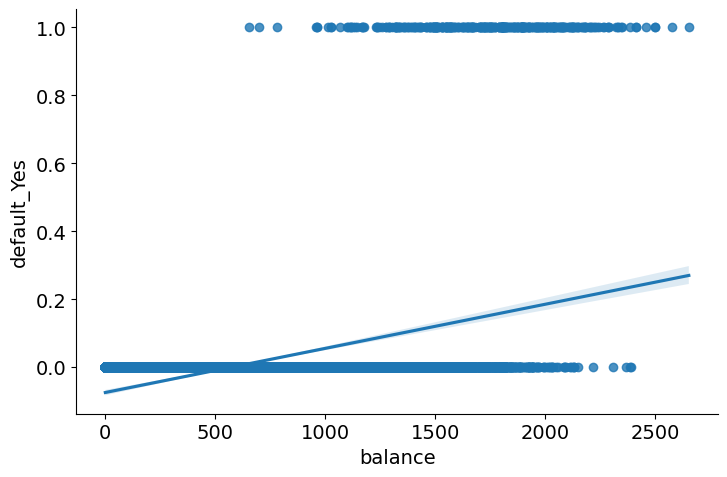

In [ ]:
sns.lmplot(x='balance', y='default_Yes', data=cred_df, aspect=1.5, fit_reg = True)

<b>Even though through linear regression, we are getting value of coefficient and intercept from the equation but this is not correct because our Output is in 0 or 1. Whereas the regression equation is generating a value between 0 to 1. So this doesnot make any sense and same has been suggested through the plot where datapoints are plotted as 0 and 1.</b>

# Creating logistic model for demonstration purpose with all data.

[[0.00549892]]
[-10.65132824]


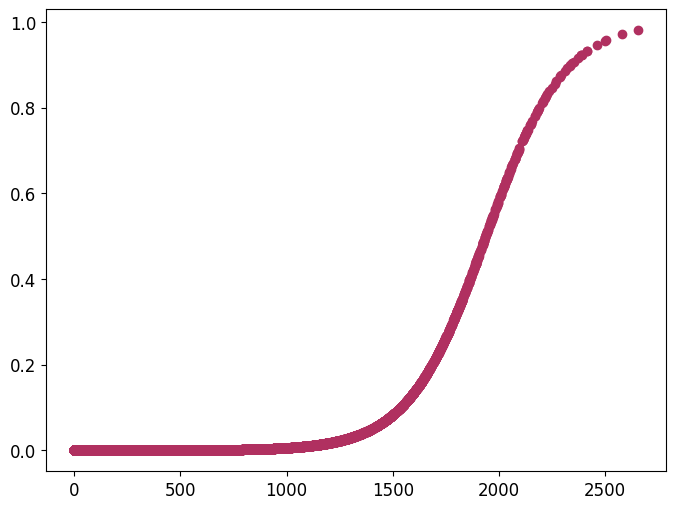

In [ ]:
#calling logistic regression  ( fitting all the data for demonstration purpose. The training & test data is excuted after this.)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)

y_pred = logreg.predict_proba(X)
plt.scatter(X.values, y_pred[:,1], color='#B03060')  # Light maroon color
#plt.scatter(X.values, y)
plt.show()

As we are intersted in only default =1, So we have plotted the only the y_pred[:,1], which gives us a sigmoid.

In [ ]:
# probability of  (class 0 , class 1)

y_pred

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

In [ ]:
# probability of class 0 only.

y_pred[:,0]

array([0.99869432, 0.9978874 , 0.99140525, ..., 0.99753348, 0.88324037,
       0.99992855])

# Creating logistic model with Train & Test Data

In [ ]:
cred_df.head()

default student  balance   income  default_Yes
0      No      No   729.53 44361.63        False
1      No     Yes   817.18 12106.13        False
2      No      No  1073.55 31767.14        False
3      No      No   529.25 35704.49        False
4      No      No   785.66 38463.50        False

In [ ]:
X.head()

balance
0   729.53
1   817.18
2  1073.55
3   529.25
4   785.66

In [ ]:
#splitting the data into train and test with 70:30 ratio
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=13)

In [ ]:
#calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)


[[0.005602]]
[-7.42029855]


In [ ]:
#fitting the model with x and y attributes of train data
#in this it is goin to learn the pattern
logreg.fit(xTrain, yTrain)

LogisticRegression(class_weight='balanced')

In [ ]:
#now applying our learnt model on test and also on train data
y_log_pred_test = logreg.predict(xTest)
y_log_pred_train = logreg.predict(xTrain)

In [ ]:
y_log_pred_test.shape

(3000,)

In [ ]:
y_log_pred_train.shape

(7000,)

In [ ]:
y_log_pred_test


array([False, False, False, ..., False, False, False])

# CONFUSION MATRIX

In [ ]:
#creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(yTest, y_log_pred_test)
conf

array([[2514,  377],
       [  22,   87]])

In [ ]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(yTest, y_log_pred_test)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP",TP)
print ("TN",TN)
print("FN",FN)
print ("FP",FP)

[[2514  377]
 [  22   87]]
TP 87
TN 2514
FN 22
FP 377


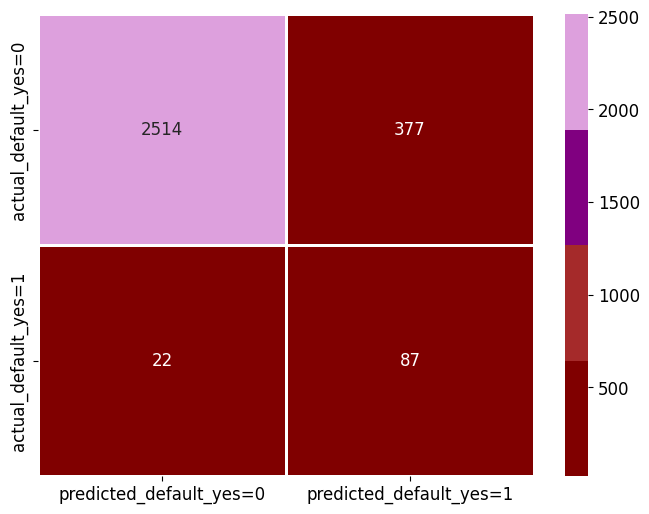

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with maroon and purple shades
colors = ["#800000", "#A52A2A", "#800080", "#DDA0DD"]
cmap = sns.color_palette(colors, as_cmap=True)

# Create the heatmap with cell borders
sns.heatmap(conf,
            cmap=cmap,
            xticklabels=['predicted_default_yes=0','predicted_default_yes=1'],
            yticklabels=['actual_default_yes=0','actual_default_yes=1'],
            annot=True,
            fmt="d",
            linewidths=1,  # Add borders with linewidth 1
            linecolor='white')  # Set border color to white

plt.show()

**Result:**

TrueNegative(TN) = 2508 cases, which are nondefault and predicted as nondefault as well.

TruePositive(TP) = 88 cases, which are default and predicted as default as well.

FalseNegative(FN) = 21 cases, which are actually default but predicted as nondefault.

FalsePositive(FP) = 383 cases, which are actually nondefault but predicted as default.


In [ ]:
# print the first 25 true and predicted responses
print('True', yTest.values[0:15])
print('Pred', y_log_pred_test[0:15])

True [False False False False False False False False False False False False
 False  True False]
Pred [False False False False False False  True False  True False  True  True
  True  True  True]


# Metrics computed from a confusion matrix

**1.Classification Accuracy: Overall, how often is the classifier correct?** This is discussed above in  detail under the classification accuracy.

In [ ]:
#comparing the metrics of predicted lebel and real label of test data
print('Accuracy_Score:', metrics.accuracy_score(yTest, y_log_pred_test))

Accuracy_Score: 0.867


This suggest that 86.5% observations of credit defaults rates are correctly or accurately observe by our model.

<b>2.Classification Error: Overall, how often is the classifier incorrect?</b>. It is nothing but (1-classification accuracy)

**Also known as "Misclassification Rate"**

In [ ]:
 # Method to calculate Classification Error


print('Classification Error:',1 - metrics.accuracy_score(yTest, y_log_pred_test))

Classification Error: 0.133


<b>3.Sensitivity or Recall:</b> When the actual value is positive, how often is the prediction correct? .

In [ ]:
# Method to calculate Sensitivity

print('Sensitivity or Recall:', metrics.recall_score(yTest, y_log_pred_test))


Sensitivity or Recall: 0.7981651376146789


**4.Specificity: When the actual value is negative, how often is the prediction correct?**


In [ ]:
specificity = TN / (TN + FP)

print(specificity)

0.8695952957454168


<b>7.Classification Report.</b>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yTest, y_log_pred_test))

              precision    recall  f1-score   support

       False       0.99      0.87      0.93      2891
        True       0.19      0.80      0.30       109

    accuracy                           0.87      3000
   macro avg       0.59      0.83      0.62      3000
weighted avg       0.96      0.87      0.90      3000



In [ ]:
cred_df.head()

default student  balance   income  default_Yes
0      No      No   729.53 44361.63        False
1      No     Yes   817.18 12106.13        False
2      No      No  1073.55 31767.14        False
3      No      No   529.25 35704.49        False
4      No      No   785.66 38463.50        False

In [ ]:
#Defining a sample data to test the model
# As we discussed earlier, income has no significance in default. So only balance is considered as input & X = cred_df[['balance']]

feature_cols = ['balance']
data =[817.18]
studentid_2=pd.DataFrame([data],columns=feature_cols)
studentid_2.head()

balance
0   817.18

In [ ]:
predictions_default=logreg.predict(studentid_2)
print(predictions_default)

[False]


**output is zero means, the Studentid_2 is a nondefault case and not going to have default anytime soon.**

# Adjusting the classification threshold

In [ ]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(xTest)[0:10]

array([False, False, False, False, False, False,  True, False,  True,
       False])

In [ ]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(xTest)[0:10]

array([[9.98186826e-01, 1.81317446e-03],
       [7.97957519e-01, 2.02042481e-01],
       [6.98833985e-01, 3.01166015e-01],
       [9.99543215e-01, 4.56785215e-04],
       [5.27790852e-01, 4.72209148e-01],
       [9.99745330e-01, 2.54669986e-04],
       [3.34009910e-01, 6.65990090e-01],
       [6.39462429e-01, 3.60537571e-01],
       [2.94739051e-02, 9.70526095e-01],
       [8.56077423e-01, 1.43922577e-01]])

In [ ]:
# print the first 10 predicted probabilities for class 1   ( predicting diabetic cases =1)
logreg.predict_proba(xTest)[0:10, 1]

array([1.81317446e-03, 2.02042481e-01, 3.01166015e-01, 4.56785215e-04,
       4.72209148e-01, 2.54669986e-04, 6.65990090e-01, 3.60537571e-01,
       9.70526095e-01, 1.43922577e-01])

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(xTest)[:, 1]

In [ ]:
y_pred_prob[0:10]

array([1.81317446e-03, 2.02042481e-01, 3.01166015e-01, 4.56785215e-04,
       4.72209148e-01, 2.54669986e-04, 6.65990090e-01, 3.60537571e-01,
       9.70526095e-01, 1.43922577e-01])

Text(0, 0.5, 'Frequency')

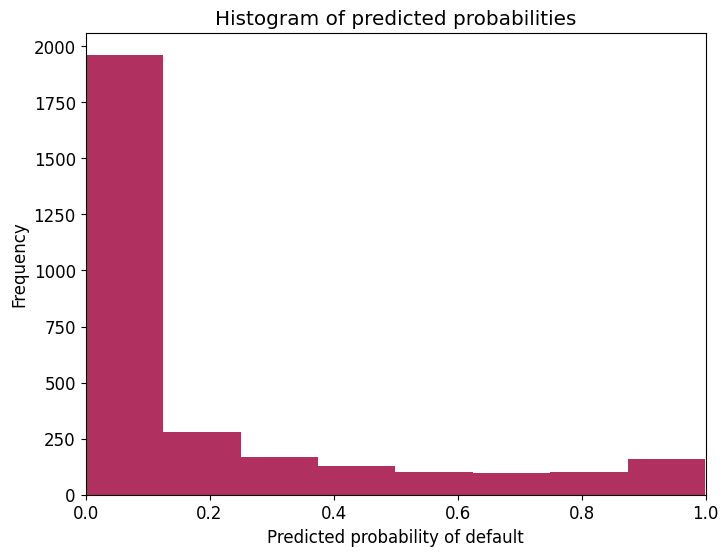

In [ ]:
# Plotting predicion through histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt

# Define light maroon color
light_maroon = '#B03060'  # Light maroon color code

# 8 bins with specified color and no edgecolor
plt.hist(y_pred_prob, bins=8, color=light_maroon, edgecolor='none')

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of default')
plt.ylabel('Frequency')

Histogram suggest that the predicted probabilities are positively-skewed distribution with a long tail on right side and most of the probabilities are <0.1. So we going to change the threshold for probability from 0.5 to 0.1 with binarize function.

In [ ]:
# predict diabetes if the predicted probability is greater than 0.1
from sklearn.preprocessing import binarize
from sklearn.preprocessing import Binarizer
from sklearn import preprocessing
# it will return 1 for all values above 0.1 and 0 otherwise
# results are 2D so we slice out the first column

# Use threshold as a named parameter
y_pred = binarize(y_pred_prob.reshape(-1,1), threshold=0.1)

In [ ]:
y_pred.shape

(10000, 2)

In [ ]:
# probability with revised threshold =0.1

y_pred_prob[0:10]

array([1.81317446e-03, 2.02042481e-01, 3.01166015e-01, 4.56785215e-04,
       4.72209148e-01, 2.54669986e-04, 6.65990090e-01, 3.60537571e-01,
       9.70526095e-01, 1.43922577e-01])

In [ ]:
# Outcome with revised threshold =0.3

y_pred[0:10]


array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       [9.99565562e-01, 4.34437534e-04],
       [9.98223040e-01, 1.77695967e-03],
       [9.96295843e-01, 3.70415690e-03],
       [9.97788566e-01, 2.21143416e-03],
       [9.97983823e-01, 2.01617700e-03],
       [9.86167007e-01, 1.38329934e-02],
       [9.99976331e-01, 2.36688219e-05]])

In [ ]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[2514  377]
 [  22   87]]


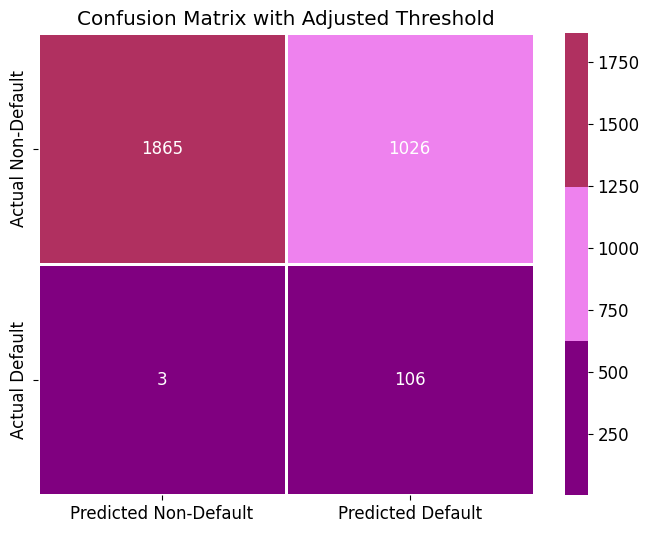

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# ... (previous code to calculate y_pred_class) ...

# Calculate the confusion matrix
conf_matrix = metrics.confusion_matrix(yTest, y_pred_class)

# Define custom colors (removing blue)
colors = ["#800080",  # Purple
          "#EE82EE",  # Violet
          "#B03060"]  # Light maroon

# Create a color map from the custom colors
cmap = sns.color_palette(colors, as_cmap=True)

# Create the heatmap using seaborn with custom color map and borders
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap=cmap,
            linewidths=1,
            linecolor='white',
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'])

plt.title('Confusion Matrix with Adjusted Threshold')
plt.show()

<b> We can see that earlier we are able to correctly classified (TP) 87 cases of default. Now, we are able to correctly classify 106 default cases by lowering the threshold.</b>


In [ ]:
# sensitivity has increased (used to be 0.81)
print (106 / float(3 + 106))

0.9724770642201835


In [ ]:
 # specificity has decreased (used to be 0.86)
print(1812 / float(1812 + 1079))

0.6267727429955033


<b>We are more interested in higher sensitivity value because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected).</b>


# Receiver Operating Characteristic (ROC) Curves


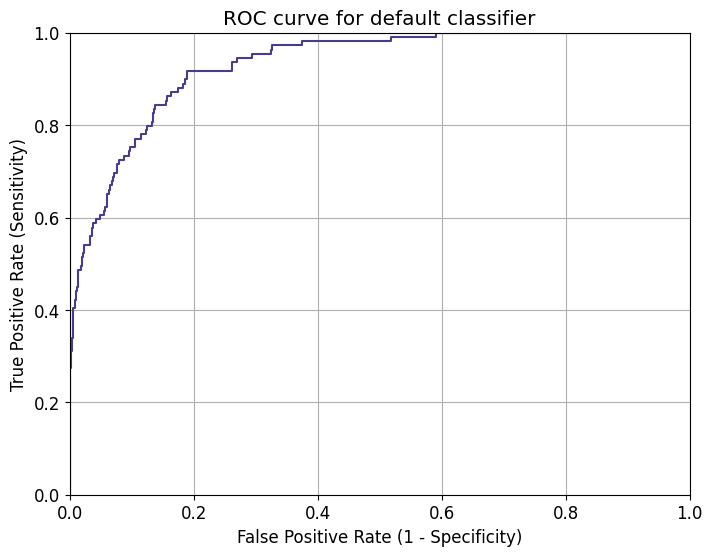

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(yTest, y_pred_prob)

plt.plot(fpr, tpr, color='#483D8B')  # Changed to dark violet
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for default classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# AUC

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

print(metrics.roc_auc_score(yTest, y_pred_prob))

0.9304865780863737
